# Final exam PHYS248

April 19, 2022

---
This is an _open-internet_ and _open-book_ exam. You are allowed to use the materials in the course repository and your own repo. You are not allowed to communicate through any means with anybody during the exam. If you use code fragments from a resource on the internet or from your own work (labs, assignments etc) make it clear what the source is in a comment line by copy-pasting the URL or name to notebooks in your `phys248` repository. 

Copy this notebook to your own `phys248` repository into your `Exam_Assignment_Quiz` folder and add/commit to your repository. Don't change the name of the notebook. Answer all questions in this (your copy of the) notebook. Once you have initial and partial results do add/commit and push to the remote. Do that regularly throughout the exam. The deadline will be 12:00pm sharp, and any commits after that time will be ignored. 

At the end make sure that all cells in your notebook execute correctly by restarting the kernel and running the notebook one last time from beginning to end. 

---

## Problem 1

### 1.1
For $r \neq 1$, the sum of the first n+1 terms of a geometric series, up to and including the $r_n$ term, is $$\sum_{k=0}^n ar^k = a  \frac{1 − r^{n + 1}}{1 − r}.$$ Check that this equation is correct by writing two functions:
1. one called `lhssum` that evaluates the left-hand side of the equation [4pts], 
2. and one called `rhsratio` that evaluates the right-hand side. [3pts] 

Both take the values `a`, `r` and `n` as inputs. Try to avoid `for` loops. 

3. Check that both functions give the same value for the following parameter combinations [3pts]:

`a` | `r` | `n`
----|----|----
2.5 | 0.75 | 8
10.75 | 1.1| 4
0.1 | 0.5 | 20



In [1]:
%pylab ipympl

Populating the interactive namespace from numpy and matplotlib


In [232]:
import numpy as np

def lhssum(a, r, n):
    # code fragment gotten from lab 3.1 activity 2
    aTerm = np.array([a]*(n+1))
    rTerm = np.array([r]*(n+1))
    nTerm = np.arange(n+1)
    return sum(aTerm*(rTerm**nTerm))

def rhsratio(a, r, n):
    return a*(1-r**(n+1))/(1-r)

# test 1
a = 2.5
r = 0.75
n = 8

print(lhssum(a, r, n))
print(rhsratio(a, r, n))

# test 2
a = 10.75
r = 1.1
n = 4

print(lhssum(a, r, n))
print(rhsratio(a, r, n))

# test 3
a = 0.1
r = 0.5
n = 20

print(lhssum(a, r, n))
print(rhsratio(a, r, n))

9.249153137207031
9.249153137207031
65.62982500000001
65.629825
0.1999999046325684
0.19999990463256836


### 1.2
Write a Python code cell that creates 1000 random numbers equally distributed between 1 and 5  and saved in an array `z`. [2pts]
- Plot a histogram of the random numbers. [2pts]
- Write the into a file called `random.dat`. Write one random number in each line, but number them (first entry has number 1) and write each line in the following format: `_1000_3.4504` where `_` means a space. [4pts]
- Using a shell command determine the size of the file random.dat in bytes. [2pts]
- Reshape `z` to represent the `(x,y)` components of 500 points. Plot these as a scatter plot where the color represents the values of the function $f_1 = \cos(y^2)$ and the size of the symbols is proportional (chose a suitable proportionality factor) to $f_2 = 1+sin(x^2)$ [5pts]
    
**Solution:**

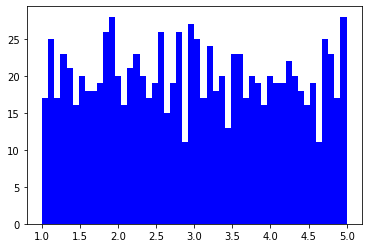

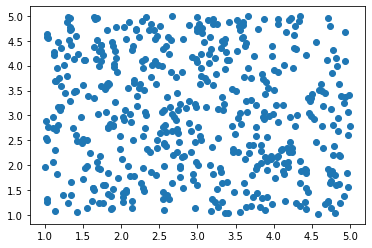

In [77]:
import numpy as np
import random
import matplotlib.pyplot as plt

# store 1000 random values into z array
z = np.array([0.0]*1000)
for i in range(1000):
    x = random.uniform(1, 5)
    z[i] = x

# plot histogram
plt.hist(z, bins=50, color = 'blue', label = 'frequency of each random values')
plt.show()
    
# write into the file
f = open("random.dat", "w")
for i in range(1000):
    f.writelines(f'_{i+1}_{z[i]:.4f}\n')
f.close()

# determine the size of the random.dat file
# bash command: du -b random.dat

# reshape z
z = z.reshape(2, 500)
# create size array
x = z[0]
size = lambda x: 1+np.sin(x**2)
# create color array
y = z[1]
col = lambda y: np.cos(y**2)

# scatter plot used from Assignment 2
plt.scatter(z[0], z[1], cmap=col(y))
plt.show()

## Problem 2


Write a Python function that implements the following function
$$
f(x) = x^{2} \exp\frac{1}{4 x} + \sin{x^3 }
$$

1. Make a plot of the function for $x\in [-4,2]$ using an x array with 1000 intervals. Calculate the derivative numerically in either way you wish (but not anlytically) and add the function  $0.1 \frac{df}{dx}$ to the plot. [5pts]
2. Test if the points $(x,f(x))$ are correlated by calculating the Pearson's $r$ correlation coefficient. Fit a linear relation to the points $(x,f(x))$ using linear regression. Add the resulting line to the plot. [5pts]
3. Calculate the value of the integral of $f(x)$ in the given range using
    - Monte Carlo integration
    - and a suitable Scipy library method [5pts]
4. Find all roots of $f(x)$. First find approximate locations of all roots by considering the sign of the product of neighboring values of the function. Then, with these estimates find the locations of the roots to within an accuracy of $10^{-3}$ using a suitable Scipy library. [5pts]
5. Find the global minimum of $f(x)$ within the range using simulated annealing with a starting value of $x_\mathrm{ini} = -3.5$. Make a plot that shows all states and with a different marker and connected with a line just the accepted states. This plot will help to calibrate the parameters of your cooling and neighbour functions to reliably find the minimum, for example, all the time with 10 tries. [5pts]

Pearson r coefficient: -0.3877145906962873


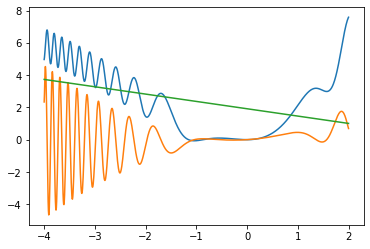

integral of f(x) using scipy: 14.190100128212986
5.106127856683962
roots: [-1.1560000000000001, -0.8679999999999999]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import stats

x = np.linspace(-4, 2, 1001)
f = lambda x: (x**2)*np.e**(x/4)+np.sin(x**3)

dydx = np.gradient(f(x), x)
plt.plot(x, f(x))
plt.plot(x, 0.1*dydx)

""" correlation check
    The code is taken from lab 12.2"""
slope, y_int, r, p, err = stats.linregress(x, f(x))
plt.plot(x, slope*x+y_int)
print(f'Pearson r coefficient: {r}')
plt.show()

# calculate integral, the code is used from the Tutorialpoint

area = scipy.integrate.quad(f, -4, 2)
print(f'integral of f(x) using scipy: {area[0]}')

# find roots of f(x)
root = []
print(f(x)[1])
for i in range (len(f(x))-1):
    if f(x)[i]*f(x)[i+1] < 0:
        root.append(x[i])
print(f'roots: {root}')

# find the global min
xval= -3.5
T = 1
for i in range (10):
    dx = np.random.normal()
    if f(xval+dx) < f(x):
        xval += dx
    else:
        change = f(xval+dx)-f(xval)
        dx = np.random.normal()
        if dx < np.e**(-change/T):
            xval += dx
print(xval)

## Problem 3 

### 3.1
1. Read the data from the file `Lorentzian-data.pickle`. It contains a dictionary and its keys reveal the content which represent `x` and `y` values and a measurement error $\sigma$. Make a plot of the data. Use either the `plot` function, or (for full points) use the `errorbar` function to add errorbars. Scale your axis appropriately. [5pts]
2. Fit the x-y data with a Lorentzian profile
$$
L(x,A,x_0,\gamma) = \frac{A \gamma}{\gamma^2 +(x-x_0)^2}
$$ What are the values for the parameters $A$, $x_0$ and $\gamma$? Answer with a formatted print statement each with 2 decimals. Add the Lorentzian profile using your fit parameters to the figure using a plotting x array with 500 grid cells for $ x \in [-2,22]$. [7pts]
3. Expand on this work by adding the measurement errors given in the data set as weights to the fit of the Lorentzian profile. Use the techniques learned in class to find out about additional function options that you are not yet familiar of. Overplot a Lorentzian profile with the weighted fit. By how many percent does the answer change?  Answer in a formatted print statement with 2 decimals. [7pts]

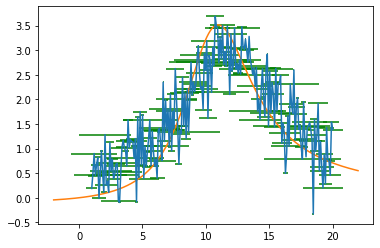

A: 3.62
x0: 10.45
gamma: 3.32



In [167]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

# borrow code fragment from lab 10.1
f = open('Lorentzian-data.pickle', 'rb')
data = pickle.load(f)

x = data['x']
y = data['y']
sigma = data['sigma']
plt.errorbar(x, y, xerr=sigma, ecolor='green')


# fit the data
A = 3.62
gamma = 3.32
x0 = 10.45
x = np.linspace(-2, 22, 500)
L = lambda x: (A*x)/(gamma**2+(x-x0)**2)
plt.plot(x, L(x))
plt.show()
print(f'A: {A}\nx0: {x0}\ngamma: {gamma}\n')



### 3.2


Solve the following system of equations numerically. Use a library. [6pts]
$$
\begin{eqnarray}
&6 x_1&   &      &+ &2 x_3& + 8 x_4  &=  &92 \\
&6 x_1& + &2 x_2 &+ &7 x_3& + 3 x_4  &=  &95 \\
&5 x_1& + &8 x_2 &+ &2 x_3& + 7 x_4  &= &151 \\
&     &&   7 x_2 &+ &4 x_3& + 9 x_4  &= &116 \\
\end{eqnarray}
$$

In [120]:
a = np.matrix([[6, 0, 2, 8], [6, 2, 7, 3], [5, 8, 2, 7], [0, 7, 4, 9]])
c = np.array([92, 95, 151, 116])

x = np.linalg.solve(a, c)
for i in range (len(x)):
    print(f'x{i}: {x[i]}')

x0: 8.0
x1: 9.0
x2: 2.0000000000000004
x3: 5.0


## Problem 4
### 4.1
The following equations describe the evolution of the two concentrations in a chemical system:

$$
\begin{eqnarray}
\frac{dx}{dt} &=& 1-(b+1)x+ax^2y\\
\frac{dy}{dt} &=& bx -ax^2y
\end{eqnarray}
$$
where $x$ and $y$ represent concentrations of two chemicals and $a$ and  $b$ are positive constants. 

1. Solve these equations (numerically) for $a=1$, $b=2.25$ with initial conditions $x=1.25$ and $y=2.25$ and plot the solution for $t\in[0,15]$. Use the scipy solver `integrate.solve_ivp`.[9pts]
2. Make a plot of $x(t)$ and $y(t)$ with 100  `t` values (including $t_0 = 0$). [4pts]
3. What is the average of all $x$ values for which $x_i>y_i$ rounded to 3 decimals? [2pts]

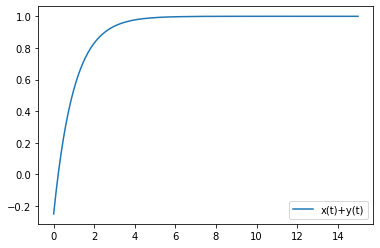

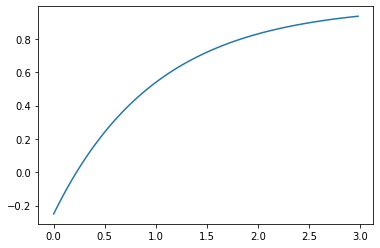

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 1
b = 2.25
t = np.linspace(0, 15, 500)

dxydt = lambda t, x: 1-(b+1)*x+b*x

# solve x(t) and plot x(t)+y(t) solution
ode = solve_ivp(fun=dxydt, t_span=(0, 15), y0=[1-3.25*1.25+2.25*1.25], t_eval=t)
plt.plot(ode.t, ode.y[0], label='x(t)+y(t)')
plt.legend()
plt.show()
#dydt = lambda t, y: b*ode.y[0]-a*(ode.y[0]**2)*y
#ode2 = solve_ivp(dydt, t_span=(0, 15), y0=2.25*1.25-(1.25**2)*2.25, t_eval=t)

# make a plot w 100 t values
plt.plot(ode.t[0:100], ode.y[0][0:100])
plt.show()



### 4.2
Solve the differential equation 
$$
\frac{dx}{dt} = -2x^3 + \sin t
$$
numerically with the initial condition $x = 0$ at $t=0$ and $t \in [0,15]$. Make a plot of $x(t)$ vs. $t$.  [10pts]

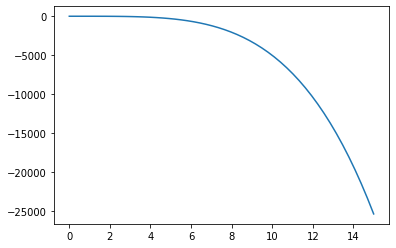

In [13]:
t = np.linspace(0, 15)
dxdt = lambda x, t: -2*x**3+np.sin(t)
ode2 = solve_ivp(dxdt, t_span=(0, 15), y0=[0], t_eval=t)
plt.plot(ode2.t, ode2.y[0])
plt.show()